# Lab 3
### Introduction to Machine Learning, 2021-2022 period 4

This assignment is to be done with a partner. Please only submit ONE .ipynb (not .py) file per pair!

**Total points: 10**

**Deadline: 2022-06-03 17:00**

**Write your names and student ids here before submission: Thijmen van der Meijden 1670786 & Max Geraedts 2048523**

## Linear Regression
With a linear regression problem, the goal is to predict the value of a certain variable $y$. In contrast to classification algorithms (such as $k$-Nearest Neighbours from the previous exercise), $y$ has a continuous value.
The output value $y$ will be modelled as a linear combination of the (transformed) input values $\mathbf{x}$. We expect these input values to influence $y$ in some way, just like with classification. The extent to which the variables influence our output is determined by an unknown target function $f$. We try to estimate that target function by using linear regression.

Like any model, a linear regression model is a simplified version of reality. We may not have access to variables that do influence $f$. We may also include input variables in our model that have no effect on the real $f(\mathbf{x})$.

Moreover, the odds of $f$ being an actual linear combination of (a transformation of) our input variables is very small. But often, a linear estimate is the best we can do.

This assignment is designed to give insight into the behaviour of linear models through multiple simulation experiments in different environments. 
In such a simulation experiment the data won't have to come from a file, but we will generate it ourselves (probabilistically). This way we have all the control over the distribution of our data: we can see all the effects different properties of these distributions have on our in-sample error and our estimation of the out-of-sample error.

We can compare the performance of the linear model under different circumstances (What happens with a more complicated target function $f$? What happens if there is more noise? What happens with less training data?)

## Our Experiment
### Data generation
Every datapoint $(\mathbf{x},y)$ will be sampled randomly. In our case $\mathbf{x}$ is a vector with six numbers. As per usual in a linear model, $x_0 = 1$. The other elements of $\mathbf{x}$ are distributed normally with expected value = 0 and variance = 1. (This is called a *standard normal distribution*.)

Once we have our $\mathbf{x}$, we generate our output label $y$ according to $y = f(\mathbf{x}) + \epsilon$, where  $\epsilon$ is normally distributed with expected value = 0 and variance = $\sigma^2$; we will experiment with various values for $\sigma$.
All the random numbers should be generated **independently** from one another. 

### Settings to experiment with:
+ The target function $f$:
    - $f_1(\mathbf{x}) = 1 + x_1$
    - $f_2(\mathbf{x}) = 1 + x_1 + 0.3x_2 + 0.1x_3 + 0.03x_4 + 0.01x_5$
+ The hypothesis class:
    - $d=1$, which means our algorithm can only see $x_0$ and $x_1$. 
    - $d=5$, which means our algorithm can use the whole vector $\mathbf{x}$. 
+ Noise:
    - $\sigma^2=0.2$
    - $\sigma^2=0.02$
+ $N$, the amount of training data:
    - $N=10$
    - $N=50$

## Experiment setup
For every combination of values listed above, perform the simulation experiment as follows:
- Repeat 100 times:
    - Create a training dataset of size $N$
    - Determine $\mathbf{w}_{\rm lin}$, the least-squares estimator (Use the formulas given in chapter 3 of the book)
    - Determine the (quadratic) in-sample error
    - Create a test dataset of size 100 using the same parameters
    - Use the test data to estimate the out-of-sample error
- Look at the means of $E_{\rm in}$ and $E_{\rm out}$ over the 100 repeats

## Your Code
Feel free to add new cells or structure your code however you like, just make sure the grader can understand it and will know how to run it with different parameters.

It is recommended to use numpy or another library of your choice for functionalities like normal distribution generators and matrix multiplication. [Here is a handy guide (in notebook form) that deals with numpy arrays, matrices and number generation.](https://github.com/ageron/handson-ml/blob/master/tools_numpy.ipynb)

**1.** Write code you can use to generate a dataset, where you can choose parameters like $N$, $\sigma^2$ and $f_{1,2}$. Be sure to check if your normal-distribution-generator needs $\sigma$ (standard deviation) or $\sigma^2$ (variance) as input parameter. **(1.5pt)**

*Hint:* Use the test_generate_data() function to check that your function is working as expected

In [1]:
import numpy as np
import math

def generate_data(f_number, N, sigma_squared):
    """
    f_number is the target function (1 or 2)
    N is the number of (training) datapoints
    sigma_squared is the variance of the noise
    
    The return value should be a tuple (X, y) where X is a matrix whose rows are datapoints
    and whose columns are the dimensions of the vector x for each datapoint, and y is a (column) vector
    with the target values for each datapoint
    """
    
    if f_number == 1:
        weights = [1, 1, 0, 0, 0, 0]
    elif f_number == 2:
        weights = [1, 1, 0.3, 0.1, 0.03, 0.01]
    else:
        raise ValueError("Function can only be 1 or 2.")
    X = np.random.randn(N, 6)
    X[:, 0] = [1]
    
    
    v_weights = np.array([weights]).T
    
    sigma = sigma_squared**0.5
    epsilon = np.random.normal(0, sigma, (N, 1))
    
    y = np.matmul(X, v_weights) + epsilon

    return (X, y)

def test_generate_data():
    # Check that without noise the label of a datapoint matches the target function
    X, y = generate_data(1, 1, 0)
    assert len(y) == 1
    assert y[0] == X[0][0] + X[0][1]
    
test_generate_data()

**2.** Write code that fits training data to a linear regression model, in other words, a function that creates $\mathbf{w}_{\rm lin}$. **(1.5pt)**

In [2]:
def fit(X, y, d):
    """
    The inputs are the training data (X,y), and the d that defines the hypothesis class
    """
    X = X[:, 0:d+1]
    
    X_ = np.linalg.inv(np.matmul(X.T, X))
    XtY = np.matmul(X.T, y)
    
    w_lin = np.matmul(X_, XtY)
    
    return w_lin

**3.** Write code to evaluate a model: determine the $E_{\rm in}$ and $E_{\rm out}$ ($E_{\rm out}$ will be estimated on the test dataset). 

Choose two sets of parameters, and for each of these, plot the target function $y = f(\mathbf{x})$ and the learned regression function $y = \mathbf{w}_{\rm lin}^{\rm T} \mathbf{x}$ in one image (use different colours for the functions). To keep your plots 2-dimensional, plot just $x_1$ on the x-axis; this means your plot will only show the functions' behaviour for $x_2 = x_3 = x_4 = x_5 = 0$. It is recommended to pick $d=1$, $f=f_1$ for your experiments in this question, because then those inputs don't matter. Also plot the training and test data that was used (as dots or similar markers). Include a legend on the plots. 

How can you assess the performance of these hypotheses looking at the two plots? Does this agree with their computed $E_{\rm in}$ and $E_{\rm out}$? In which of the two experiments do you get better performance and why? **(1.5pt)**

*Hint:* Use the test_compute_error() function to check that your function is working as expected

In [3]:
# Solution should include:
#  - a function that computes the error(s);
#  - plotting the functions and datasets from two experiments;
#  - the discussion questions.

def compute_error(w, X, y):
    # X and y can be either training or test data
    # w is the w_lin resulting from calling the fit function above
    # The return value should be the average squared error (see Eqs. 3.3 and 3.4 in the book)
    N = len(X)

    try:
        wTxT = np.matmul(w.T, X.T)
    except ValueError:
        for i in range(4):
            X = np.delete(X, 2, 1)
        wTxT = np.matmul(w.T, X.T)
    xw = np.matmul(X, w)
    yTy = np.matmul(y.T, y)
    
    avg_squared_error = (1/N) * (np.matmul(wTxT, xw) - 2 * np.matmul(wTxT, y) + yTy)

    return avg_squared_error

def test_compute_error():
    # Use some mock data to check that the error computation is working properly
    w = np.array([0.1, 1, 2]).T
    X = np.array([np.array([1, 2, 3])])
    y = np.array([0.5]).T
    expected_E = 57.76
    assert np.abs(expected_E - compute_error(w, X, y)) < 0.01
    
test_compute_error()

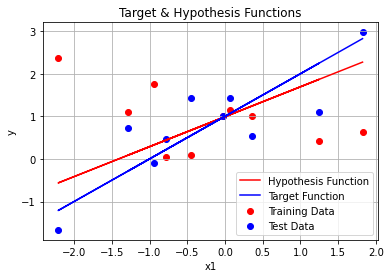

E_in: 0.14330278299471325   E_out: 0.4229926190742177


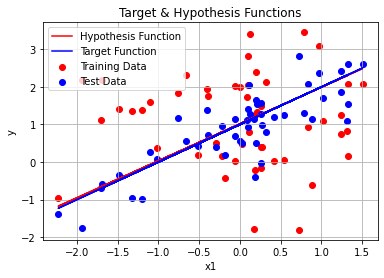

E_in: 0.21333814310545166   E_out: 0.2063318737263839


In [8]:
# FILL THIS IN
"""
You need to write a piece of code that:
- chooses two sets of parameters from the "settings to experiment with" above
- creates training and test datasets for each of those sets of parameters, and calls the fit function to get w_lin
- calls the compute_error function to compute E_in and E_out
- plots the target and hypothesis functions as required
"""
import matplotlib.pyplot as plt
#import random

# f1 = random.randint(1, 2)
# f2 = random.randint(1, 2)
# d1 = random.randrange(1, 6, 4)
# d2 = random.randrange(1, 6, 4)
# if round(random.random()) > 0.5:
#     noise1 = 0.02
# else:
#     noise1 = 0.2
# if round(random.random()) > 0.5:
#     noise2 = 0.02
# else:
#     noise2 = 0.2
# n1 = random.randrange(10, 51, 40)
# n2 = random.randrange(10, 51, 40)

def single_experiment(f_number, d, N, sigma_squared):
    trainingdata = generate_data(f_number, N, sigma_squared)
    testdata = generate_data(f_number, N, sigma_squared)

    wlin = fit(trainingdata[0], trainingdata[1], d)

    E_in = compute_error(wlin, trainingdata[0], trainingdata[1])

    if d == 1:
        E_out = compute_error(np.array([1, 1]).T, testdata[0], testdata[1])
    elif d == 5:
        E_out = compute_error(np.array([1, 1, 0.3, 0.1, 0.03, 0.01]).T, testdata[0], testdata[1])
    
    return(E_in, E_out, trainingdata, testdata, wlin)

def plotter(trainingdata, testdata, wlin):
    plt.plot(testdata[0][:,1:2], np.dot(testdata[0][:,0:2],wlin[:2]), 'r', label="Hypothesis Function")
    plt.plot(testdata[0][:,1:2], 1 + testdata[0][:,1:2], 'b', label="Target Function")
    plt.scatter(testdata[0][:,1:2], trainingdata[1],label="Training Data", color="Red")
    plt.scatter(testdata[0][:,1:2], testdata[1],label="Test Data", color="Blue")

    plt.title("Target & Hypothesis Functions")
    plt.xlabel("x1")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()
    
def make_plot():
    l = single_experiment(1, 1, 10, 0.2)
    plotter(l[2], l[3], l[4])
    print("E_in: " + str(l[0][0][0]) + "   " + "E_out: " + str(l[1][0][0]))
    l = single_experiment(2, 5, 50, 0.2)
    plotter(l[2], l[3], l[4])
    print("E_in: " + str(l[0][0][0]) + "   " + "E_out: " + str(l[1][0][0]))

make_plot()

The second set of parameters have a better performance than the first set of parameters. We can see that because the hypothesis function is overall closer to the target function. It does agree with their E_in and E_out because for the 2nd plot they are both lower (which is better). It also looks like the data points are generally closer to their function for the 2nd plot.

**4.** Write a function that, given all our parameters, performs the experiment 100 times and calculates the mean performance of the trained models. 
**(1.5pt)**

In [5]:
def experiment(f_number, d, N, sigma_squared, num_repeats):
    """
    f_number is the target function (1 or 2)
    d is the hypothesis class (1 or 5)
    N is the number of training datapoints
    sigma_squared is the variance of the noise
    num_repeats is how many times you want to run the experiment
    
    The function should print out the average in- and out-of-sample error
    """
    # FILL THIS IN
    import statistics
    E_in = []
    E_out = []
    for i in range(num_repeats):
        E_in.append(single_experiment(f_number, d, N, sigma_squared)[0])
        E_out.append(single_experiment(f_number, d, N, sigma_squared)[1])
            
    E_in_mean_performance = statistics.fmean(E_in)
    E_out_mean_performance = statistics.fmean(E_out)
    print("Average in-sample error: " + str(round(E_in_mean_performance, 3)) + " " +
          "Average out-of-sample error: " + str(round(E_out_mean_performance, 3)))


## Results
Enter your results in these tables (table 1 for $f_1$, table 2 for $f_2$).
To keep the table neat, you should round the results down to 3 decimals each. **(1pt)**


In [6]:
for target_function in [1, 2]:
    for d in [1, 5]:
        for N in [10, 50]:
            for sigma_squared in [.02, .2]:
                experiment(target_function, d, N, sigma_squared, num_repeats=100)
                print("Function: " + str(target_function) + "    " + "d: " + str(d) + "    " + "N: " + str(N) + "    " + "sigma_squared: " + str(sigma_squared))
                print()

Average in-sample error: 0.016 Average out-of-sample error: 0.02
Function: 1    d: 1    N: 10    sigma_squared: 0.02

Average in-sample error: 0.169 Average out-of-sample error: 0.199
Function: 1    d: 1    N: 10    sigma_squared: 0.2

Average in-sample error: 0.019 Average out-of-sample error: 0.02
Function: 1    d: 1    N: 50    sigma_squared: 0.02

Average in-sample error: 0.19 Average out-of-sample error: 0.198
Function: 1    d: 1    N: 50    sigma_squared: 0.2

Average in-sample error: 0.008 Average out-of-sample error: 0.129
Function: 1    d: 5    N: 10    sigma_squared: 0.02

Average in-sample error: 0.084 Average out-of-sample error: 0.29
Function: 1    d: 5    N: 10    sigma_squared: 0.2

Average in-sample error: 0.017 Average out-of-sample error: 0.123
Function: 1    d: 5    N: 50    sigma_squared: 0.02

Average in-sample error: 0.177 Average out-of-sample error: 0.294
Function: 1    d: 5    N: 50    sigma_squared: 0.2

Average in-sample error: 0.097 Average out-of-sample err

|$f_1$ |            || d=1      |           || d=5      |            |
|------|------------||----------|-----------||----------|------------|
| $n$  | $\sigma^2$ || $E_{in}$ | $E_{out}$ || $E_{in}$ | $E_{out}$  |
| 10   | .02        ||0.016     |0.020      ||0.007     |0.121       |
| 10   | .20        ||0.157     |0.207      ||0.076     |0.297       |
| 50   | .02        ||0.019     |0.020      ||0.018     |0.12        |
| 50   | .20        ||0.194     |0.201      ||0.176     |0.295       |



|$f_2$ |            || d=1      |           || d=5      |            |
|------|------------||----------|-----------||----------|------------|
| $n$  | $\sigma^2$ || $E_{in}$ | $E_{out}$ || $E_{in}$ | $E_{out}$  |
| 10   | .02        ||0.099     |0.12       ||0.008     |0.020       |
| 10   | .20        ||0.238     |0.302      ||0.091     |0.200       |
| 50   | .02        ||0.117     |0.123      ||0.017     |0.021       |
| 50   | .20        ||0.293     |0.295      ||0.180     |0.198       |


<sup>(press enter edit the table. ctrl+enter to show pretty table again. 
 If you love making $\LaTeX$ tables or hate this one, feel free to make your own one, as long as you stick to this parameter format)</sup>

## Report
Report on the experimental results. Discuss the following questions: **(3pt)**


#### 1. Which hypothesis class produced better (estimated) out-of-sample errors? Under which circumstances?

For f1 the class d=1 did better.
For f2 the class d=5 did better.

#### 2. For given training data, to what extent are the in-sample errors of a hypothesis class informative for the out-of-sample errors?

Generally, it is not for informative for d=5 because it differs quite a lot from the E_in. For d=1 E_in and E_out are quite the same, ofcourse it differs a bit but that is because we can't know all these things for certain with infinite precision. When the dataset is small (N=10) and the noise is 'big' ($\sigma^2=0.2$) E_in and E_out differ more than normal but that is logical because a lot of noise over only a few points causes a bigger disturbance.

#### 3. Can you explain your results using bias-variance analysis? How?

According to bias-variance the variance for f1 will generally be lower compared to the variance for f2. Because f2 is a more complex function than f1. The bias will generally be higher for f1 because the average hypothesis function will be less complex and thus less accurate. 
For f1 with d = 1, the variance will be low and the bias will be high which we can see because the overall E_out is lower than the average total E_out. 
For f2 with d = 5 the variance will generally be higher (compared to f1) and the bias will be lower (compared to f1). We can also see that in the results because most of the E_out's for f2 and d = 5 are also lower than the average total E_out.  
For f1 with d = 5, the variance but also the bias are somewhat higher that with d = 1 because the function is somewhat more complex but is still simple enough for a 'normal' bias. We can also see that in the results because the E_out's are generally higher than the others.
For f2 with d = 1, the variance is high but the bias is also high because the original function is more complex. We can also see that in the results because the E_out's are generally higher than the others.